### Context
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

### Data Description 
| Features  | Description |
| ------------- | ------------- |
| battery_power  | Total energy a battery can store in one time measured in mAh  |
| blue  | Has bluetooth or not  |
| clock_speed | speed at which microprocessor executes instructions  |
| dual_sim  | Has dual sim support or not |
| fc  | Front Camera mega pixels |
| four_g  | Has 4G or not  |
| int_memory  |Internal Memory in Gigabytes |
| m_dep  | Mobile Depth in cm  |
| mobile_wt  | Weight of mobile phone  |
| n_cores  |Number of cores of processor |
| pc  |Primary Camera mega pixels |
| px_height  | Pixel Resolution Height |
| px_width  |Pixel Resolution Width |
| ram  |Random Access Memory in Mega Bytes |
| sc_h  | Screen Height of mobile in cm |
| sc_w  | Screen Width of mobile in cm  |
| talk_time  |longest time that a single battery charge will last when you are   |
| three_g  | Has 3G or not  |
| touch_screen  | Has touch screen or not  |
| wifi  |Has wifi or not |
| price_range   | This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).  |

### Results
Here are some insight that I got from this EDA:
- Battery_power has **positive correlation** with price_range. The **more quality** of the battery_power will **increase** the price_range
- Ehether or not bluetooth **does not really affect** the price
- clock_speed has **negative correlation** with price_range. The **smaller the speed** of execute intructions would **increase the price_range**
- Mobile phone with dual_sim also could be sell in all price_range. but it would be even better if we sell it at the **very high cost** for more revenue
- Mobile phone with **good Front Camera** (11-19 MP)  has higher estimates price_range
- Mobile phone with four_g also could be sell in all price_range. But it would be even better if we sell it at the **very high cost** for more revenue
- Mobile phone that **light** should be sell in **very high cost** while Mobile phone that **weight** could be sell in all price_range **except very high cost**
- Mostly mobile phone selled with **4 n_cores**. The price_range for 4 n_cores should be sell in **medium or high cost**
- ram has **positif correlation** with price_range. The higher ram, the higher price_range of mobile phone 
- The longest average of talk_time for **high battery** is around 11.50 hour with Very high price_range
- it is advisable to sell mobile phone with three_g because it could be sell in any price_range

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv(r'D:\PURWADHIKA\MODUL 03\DATASET\train_mobil_price.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
## Checking for missing value
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
##Checking Outliers
#First, I separate of categorical or object and numerical data types (int64 & float64)
#This separation is done to check the outliers in the numeric column using the boxplot

numeric_col = []
categorical_col = []
for i in df.columns:
    #categorical columns
    if df[i].dtype == 'object':
        categorical_col.append(i)
    else:
        #numeric columns
        numeric_col.append(i)
        
print('Numerical Columns ({})'.format(len(numeric_col)))
print(numeric_col)
print('-'*100)
print('Categorical Columns ({})'.format(len(categorical_col)))
print(categorical_col)

Numerical Columns (21)
['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']
----------------------------------------------------------------------------------------------------
Categorical Columns (0)
[]


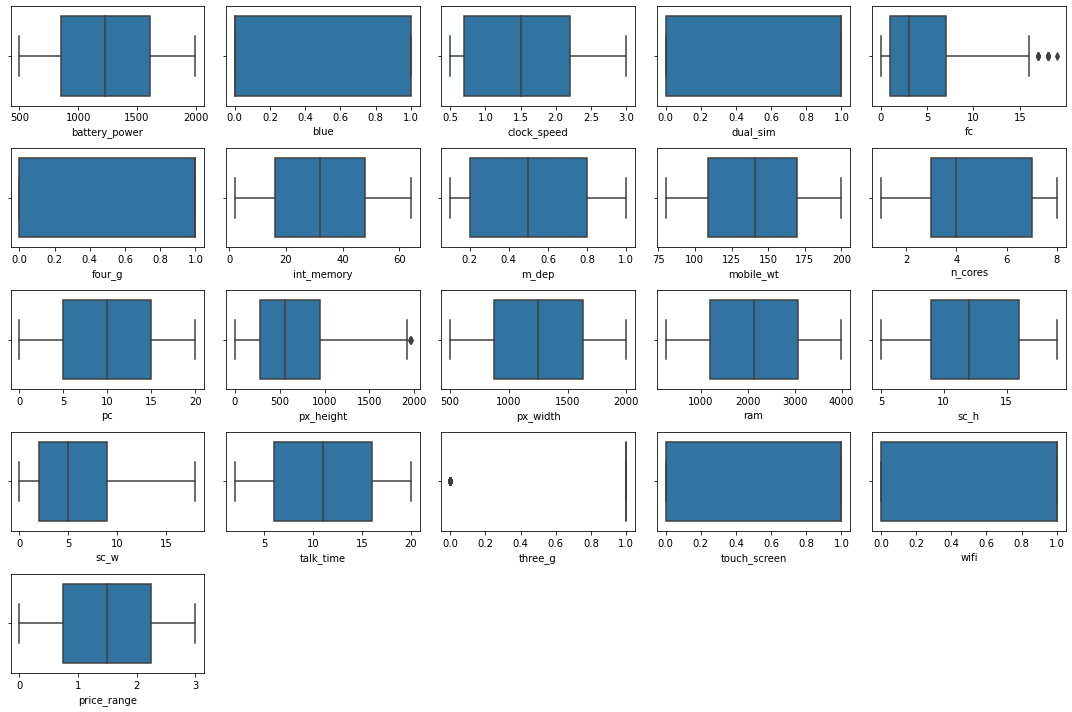

In [7]:
## Boxplot
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_col):
    plt.subplot(5,5,i+1)
    sns.boxplot(df[col])
    plt.tight_layout()

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [11]:
mobil_priceDESC = []

for i in df.columns:
    mobil_priceDESC.append([
    i,
    df[i].dtypes,
    df[i].isna().sum(),
    (((df[i].isna().sum())/len(df))*100).round(2),
    df[i].nunique(),
    df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(data=mobil_priceDESC, columns=['feature_name', 'type', 'Null', 'Percentage Null', 'No Unique', 'Example Unique'])

,feature_name,type,Null,Percentage Null,No Unique,Example Unique
0,battery_power,int64,0,0.0,1094,"[1266, 1528]"
1,blue,int64,0,0.0,2,"[0, 1]"
2,clock_speed,float64,0,0.0,26,"[2.4, 2.0]"
3,dual_sim,int64,0,0.0,2,"[1, 0]"
4,fc,int64,0,0.0,20,"[11, 18]"
5,four_g,int64,0,0.0,2,"[1, 0]"
6,int_memory,int64,0,0.0,63,"[20, 16]"
7,m_dep,float64,0,0.0,10,"[0.5, 0.8]"
8,mobile_wt,int64,0,0.0,121,"[126, 183]"
9,n_cores,int64,0,0.0,8,"[6, 5]"


In [40]:
df.corr()['price_range'].sort_values(ascending=False)[1:]

ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

### Data Analyst & Visualization

### `price_range`

In [12]:
df.stb.freq(['price_range'])

,price_range,count,percent,cumulative_count,cumulative_percent
0,3,500,25.0,500,25.0
1,2,500,25.0,1000,50.0
2,1,500,25.0,1500,75.0
3,0,500,25.0,2000,100.0


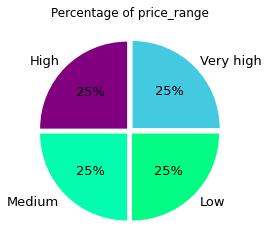

In [15]:
#Here are visualization of Response using pie chart
percentage = [25, 25, 25, 25]
label = ['Very high', 'High', 'Medium', 'Low']

plt.pie( percentage, labels=label,
        colors=[ '#43c9e0', 'purple', '#03fcad', '#03fc84'],
        startangle=0,
        textprops ={
            'size': 13,
            'color':'black'
        },
        autopct='%1.f%%',
        radius=1,
        explode=(.05, .04, .04, .04)
)
plt.title('Percentage of price_range')
# plt.savefig('D:\\PURWADHIKA\\MODUL 03\\PICTURES\\Response_Percent.png')
plt.show()

### `battery_power	`

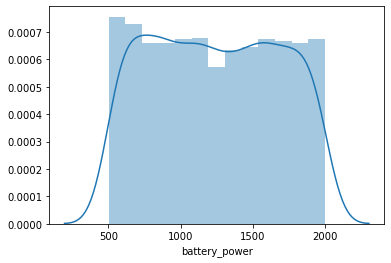

In [16]:
sns.distplot(df['battery_power'])

In [63]:
## Binning for easier analyst
bin_battery=[500, 1000, 1500, 1998] #range kelompok (501-1000, 1001-1500, 1501-1998)
label = ['low', 'medium', 'high']
df['battery_bin'] = pd.cut(df['battery_power'], bins=bin_battery, labels=label)

In [24]:
df['battery_bin'].unique()

[low, medium, high]
Categories (3, object): [low < medium < high]

In [21]:
((pd.crosstab(index=df['battery_bin'], columns=df['price_range'],normalize='index', margins=True))*100).round(2)

price_range,0,1,2,3
battery_bin,,,,
low,32.52,24.17,26.76,16.55
medium,26.05,27.77,21.68,24.49
high,16.16,23.11,26.28,34.44
All,25.03,24.97,24.97,25.03


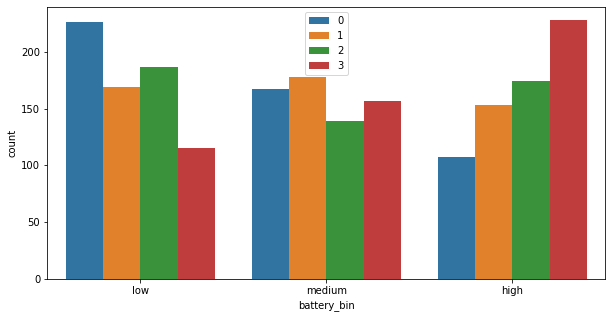

In [25]:
#Visualization
plt.figure(figsize=(10,5))
sns.countplot(df['battery_bin'], hue=df['price_range'])
plt.legend(loc='best')

- mobile phone with **low battery_power** mostly has **low cost**
- mobile phone with **medium battery_power** mostly has **medium cost**
- mobile phone with **high battery_power** mostly has **very high cost**

### `blue`

In [28]:
df.stb.freq(['blue'])

,blue,count,percent,cumulative_count,cumulative_percent
0,0,1010,50.5,1010,50.5
1,1,990,49.5,2000,100.0


In [32]:
((pd.crosstab(index=df['price_range'], columns=df['blue'],normalize='index', margins=True))*100).round(2)

blue,0,1
price_range,,
0,51.4,48.6
1,51.0,49.0
2,51.4,48.6
3,48.2,51.8
All,50.5,49.5


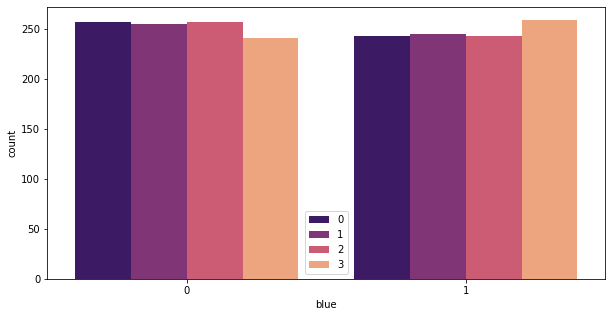

In [106]:
#Visualization
plt.figure(figsize=(10,5))
sns.countplot(df['blue'], hue=df['price_range'], palette='magma')
plt.legend(loc='best')

- whether or not bluetooth does not really affect the price

### `clock_speed`

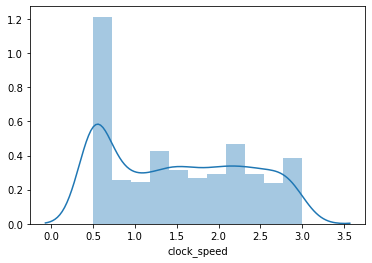

In [33]:
sns.distplot(df['clock_speed'])

In [109]:
df['clock_speed'].unique()

array([2.2, 0.5, 2.5, 1.2, 1.7, 0.6, 2.9, 2.8, 2.1, 1. , 0.9, 1.1, 2.6,
       1.4, 1.6, 2.7, 1.3, 2.3, 2. , 1.8, 3. , 1.5, 1.9, 2.4, 0.8, 0.7])

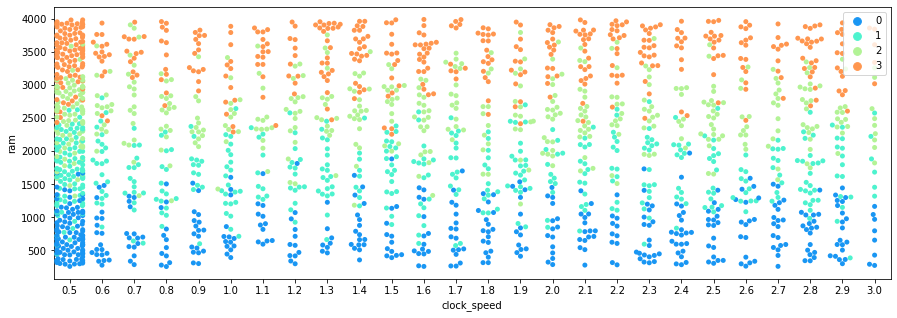

In [111]:
#Visualization
plt.figure(figsize=(15,5))
sns.swarmplot(x = df['clock_speed'], y= df['ram'], hue=df['price_range'], palette='rainbow')
plt.legend(loc='best')

- clock_speed has **negative correlation** with price_range. The **smaller the speed** of execute intructions would **increase the price_range**


### `dual_sim`

In [45]:
df.stb.freq(['dual_sim'])

,dual_sim,count,percent,cumulative_count,cumulative_percent
0,1,1019,50.95,1019,50.95
1,0,981,49.05,2000,100.00


In [46]:
((pd.crosstab(index=df['price_range'], columns=df['dual_sim'],normalize='index', margins=True))*100).round(2)

dual_sim,0,1
price_range,,
0,50.00,50.00
1,49.00,51.00
2,50.20,49.80
3,47.00,53.00
All,49.05,50.95


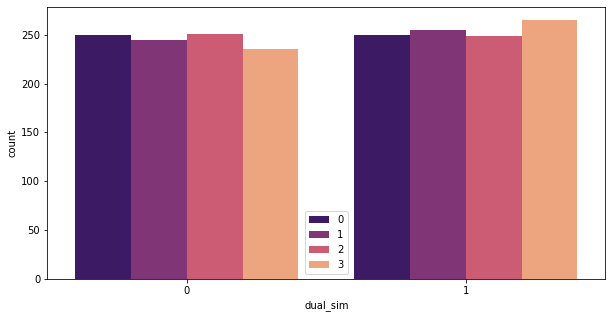

In [97]:
#Visualization
plt.figure(figsize=(10,5))
sns.countplot(df['dual_sim'], hue=df['price_range'], palette='magma')
plt.legend(loc='best')

- Mobile phone without dual_sim could be sell in all price_range because it has similar count
- Mobile phone with dual_sim also could be sell in all price_range. but it would be even better if we sell it at the **very high cost** for more revenue

### ` fc (Front Camera)`

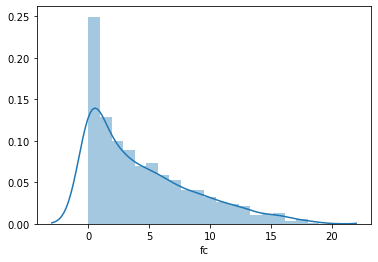

In [55]:
sns.distplot(df['fc'])

In [115]:
## Binning for easier analyst
bin_fc=[0, 10, 19] #range kelompok (0-10, 11-19)
label = ['bad', 'good']
df['fc_bin'] = pd.cut(df['fc'], bins=bin_fc, labels=label)

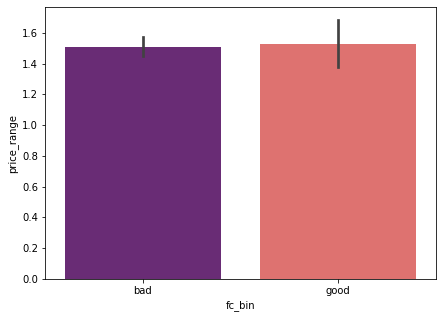

In [118]:
#Visualization
plt.figure(figsize=(7,5))
sns.barplot(x=df['fc_bin'], y=df['price_range'], palette='magma')

- From the scatterplot, it showed that **fc has small correlation with price_range**
- Mobile phone with **good** (11-19 MP) has higher estimates price_range

### `four_g`

In [4]:
df.stb.freq(['four_g'])

,four_g,count,percent,cumulative_count,cumulative_percent
0,1,1043,52.15,1043,52.15
1,0,957,47.85,2000,100.00


In [5]:
((pd.crosstab(index=df['price_range'], columns=df['four_g'],normalize='index', margins=True))*100).round(2)

four_g,0,1
price_range,,
0,48.20,51.80
1,47.60,52.40
2,50.60,49.40
3,45.00,55.00
All,47.85,52.15


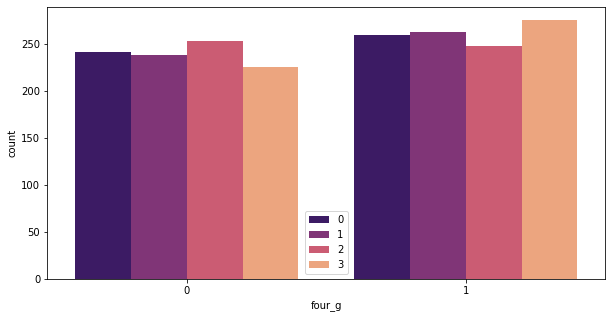

In [98]:
#Visualization
plt.figure(figsize=(10,5))
sns.countplot(df['four_g'], hue=df['price_range'], palette='magma')
plt.legend(loc='best')

- Mobile phone without four_g could be sell in all price_range. But it would be even better if we sell it at **high cost**
- Mobile phone with four_g also could be sell in all price_range. But it would be even better if we sell it at the **very high cost** for more revenue

### `int_memory`

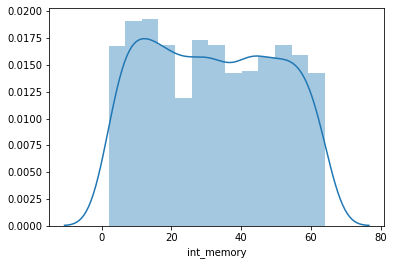

In [9]:
sns.distplot(df['int_memory'])

In [10]:
df['int_memory'].unique()

array([ 7, 53, 41, 10, 44, 22, 24,  9, 33, 17, 52, 46, 13, 23, 49, 19, 39,
       47, 38,  8, 57, 51, 21,  5, 60, 61,  6, 11, 50, 34, 20, 27, 42, 40,
       64, 14, 63, 43, 16, 48, 12, 55, 36, 30, 45, 29, 58, 25,  3, 54, 15,
       37, 31, 32,  4, 18,  2, 56, 26, 35, 59, 28, 62], dtype=int64)

In [4]:
## Binning for easier analyst
bin_memory=[6, 25, 45, 62] #range kelompok (6-25, 26-45, 46-62)
label = ['low', 'medium', 'high']
df['memory_bin'] = pd.cut(df['int_memory'], bins=bin_memory, labels=label)

In [5]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,memory_bin
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,low
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,high
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,medium
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,low
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,medium


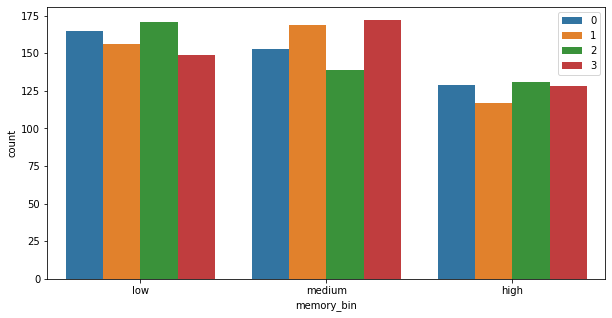

In [6]:
# #Visualization
plt.figure(figsize=(10,5))
sns.countplot(df['memory_bin'], hue=df['price_range'])
plt.legend(loc='best')

- Mobile phone with **low int_memory** should be sell in **low or high cost**
- Mobile phone with **medium int_memory** should be sell in **medium or very high cost**
- Mobile phone with **high int_memory** should be sell in **high or very high cost**

### `m_dep`
Mobile Depth in cm

In [10]:
df.stb.freq(['m_dep'])

,m_dep,count,percent,cumulative_count,cumulative_percent
0,0.1,320,16.00,320,16.00
1,0.2,213,10.65,533,26.65
2,0.8,208,10.40,741,37.05
3,0.5,205,10.25,946,47.30
4,0.7,200,10.00,1146,57.30
5,0.3,199,9.95,1345,67.25
6,0.9,195,9.75,1540,77.00
7,0.6,186,9.30,1726,86.30
8,0.4,168,8.40,1894,94.70
9,1.0,106,5.30,2000,100.00


In [7]:
df['m_dep'].unique()

array([0.6, 0.7, 0.9, 0.8, 0.1, 0.5, 1. , 0.3, 0.4, 0.2])

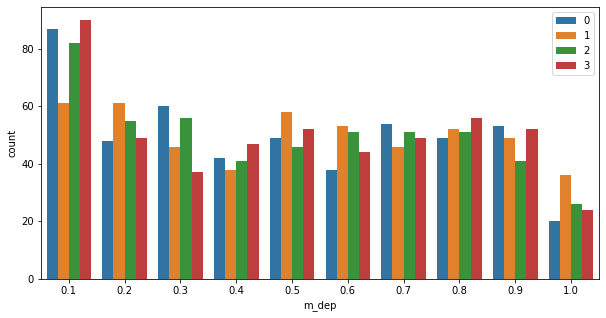

In [11]:
# #Visualization
plt.figure(figsize=(10,5))
sns.countplot(df['m_dep'], hue=df['price_range'])
plt.legend(loc='best')

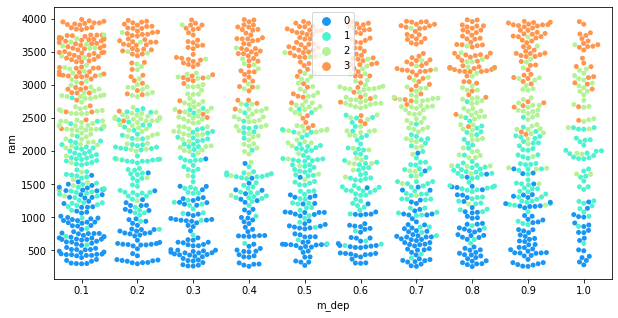

In [12]:
#Visualization
plt.figure(figsize=(10,5))
sns.swarmplot(x = df['m_dep'], y= df['ram'], hue=df['price_range'], palette='rainbow')
plt.legend(loc='best')

- Mobile phone with dept 0.1 cm has highest cost, So it would be better to sell it with very high cost

### `mobile_wt`
Weight of mobile phone (g)

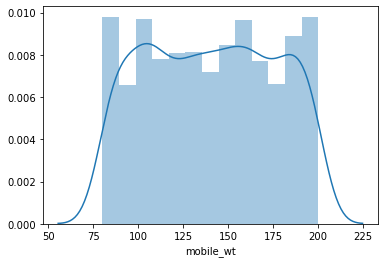

In [14]:
sns.distplot(df['mobile_wt'])

In [20]:
## Binning for easier analyst
bin_weight=[79, 151, 200] #range kelompok (79-150, 151-200)
label = ['light', 'weight']
df['weight_bin'] = pd.cut(df['mobile_wt'], bins=bin_weight, labels=label)

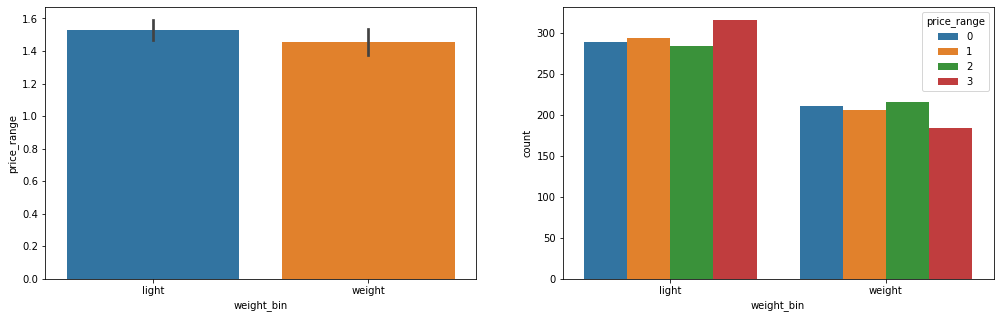

In [99]:
# #Visualization
plt.figure(figsize=(17,5))

plt.subplot(1,2,1)
sns.barplot(x =df['weight_bin'], y=df['price_range'])

plt.subplot(1,2,2)
sns.countplot(df['weight_bin'], hue=df['price_range'])

plt.show()

- Mobile phone that **light** (weight<150 g) has **estimates price_range higher** rather than **weight** (weight>150 g)
- Mobile phone that **light** should be sell in **very high cost**
- Mobile phone that **weight** could be sell in all price_range **except very high cost**

### `n_cores`
Number of cores of processor

In [30]:
df.stb.freq(['n_cores'])

,n_cores,count,percent,cumulative_count,cumulative_percent
0,4,274,13.70,274,13.70
1,7,259,12.95,533,26.65
2,8,256,12.80,789,39.45
3,2,247,12.35,1036,51.80
4,5,246,12.30,1282,64.10
5,3,246,12.30,1528,76.40
6,1,242,12.10,1770,88.50
7,6,230,11.50,2000,100.00


In [32]:
((pd.crosstab(index=df['n_cores'], columns=df['price_range'], normalize='index'))*100).round(2)

price_range,0,1,2,3
n_cores,,,,
1,20.25,31.40,21.49,26.86
2,27.94,23.89,23.08,25.10
3,25.20,28.05,22.76,23.98
4,24.45,27.74,26.64,21.17
5,23.98,20.73,26.83,28.46
6,26.52,23.48,24.78,25.22
7,25.48,21.24,26.64,26.64
8,26.17,23.44,27.34,23.05


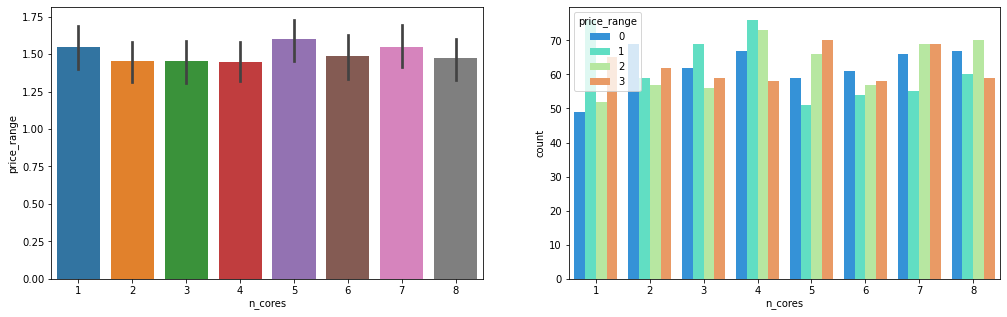

In [100]:
# #Visualization
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
sns.barplot(x =df['n_cores'], y=df['price_range'])

plt.subplot(1,2,2)
sns.countplot(df['n_cores'], hue=df['price_range'], palette='rainbow')

plt.show()

- Mostly mobile phone selled with **4 n_cores**
- The price_range for 4 n_cores should be sell in **medium or high cost**

### `pc`
Primary Camera mega pixels

In [101]:
df['pc'].nunique()

21

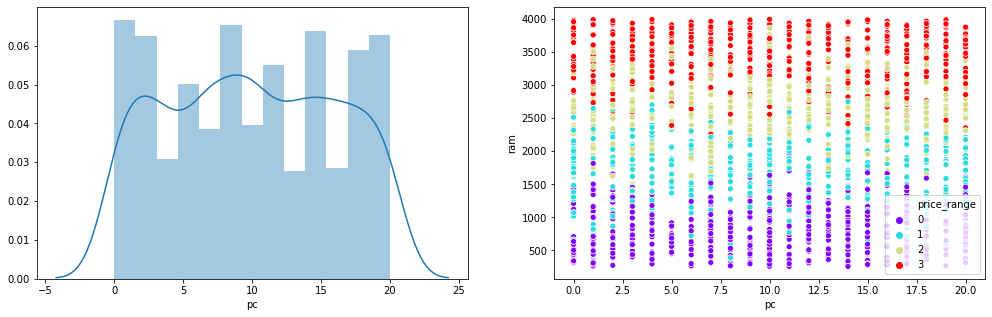

In [43]:
#Visualization
plt.figure(figsize=(17,5))

plt.subplot(1,2,1)
sns.distplot(df['pc'])

plt.subplot(1,2,2)
sns.scatterplot(x = df['pc'], y= df['ram'], hue=df['price_range'], palette='rainbow')
plt.legend(loc='best')

plt.show()

- **0 pc will be dropped for next machine learning**

### `px_height & px_width`
Pixel Resolution Height\
Pixel Resolution Width

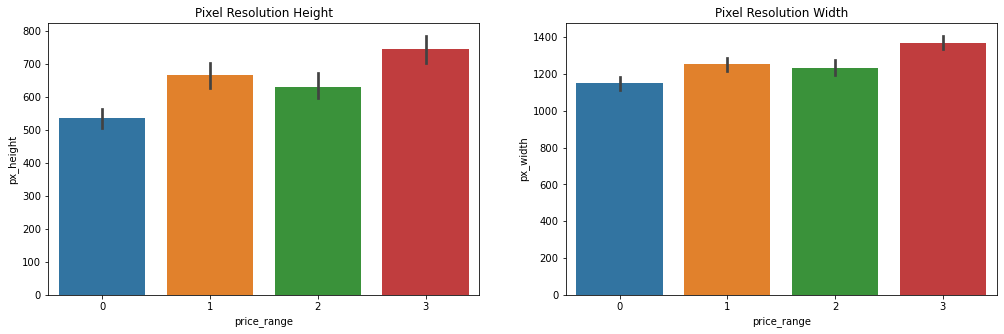

In [50]:
#Visualization
plt.figure(figsize=(17,5))

plt.subplot(1,2,1)
sns.barplot(x=df['price_range'], y=df['px_height'])
plt.title('Pixel Resolution Height')

plt.subplot(1,2,2)
sns.barplot(x=df['price_range'], y=df['px_width'])
plt.title('Pixel Resolution Width')

plt.show()

- Mobile phone with **Very high cost** has **highest confidence intervals** for both Pixel Resolution Height & Pixel Resolution Width

### `ram`
Random Access Memory in Mega Bytes

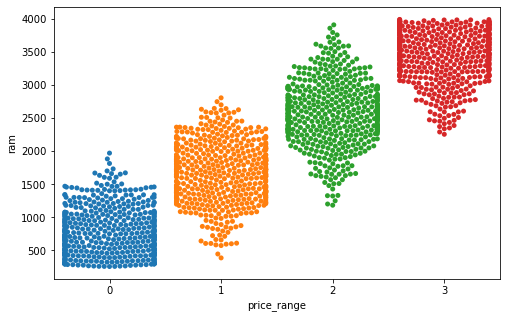

In [57]:
plt.figure(figsize=(8,5))
sns.swarmplot(x='price_range', y='ram', data=df)
plt.show()

- ram has **positif correlation** with price_range 
- The higher ram, the higher price range of mobile phone 

### `sc_h & sc_w`
Screen Height of mobile in cm (sc_h)\
Screen Width of mobile in cm (sc_w)

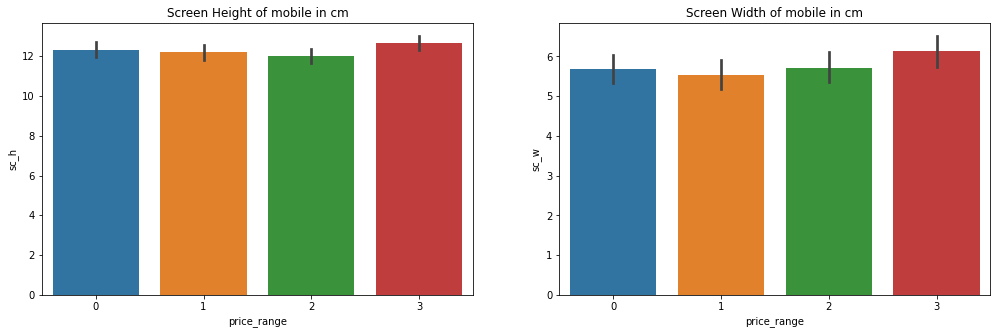

In [58]:
#Visualization
plt.figure(figsize=(17,5))

plt.subplot(1,2,1)
sns.barplot(x=df['price_range'], y=df['sc_h'])
plt.title('Screen Height of mobile in cm')

plt.subplot(1,2,2)
sns.barplot(x=df['price_range'], y=df['sc_w'])
plt.title('Screen Width of mobile in cm')

plt.show()

- Mobile phone with **Very high cost** has **highest confidence intervals** for both Screen Height of mobile in cm & Screen Width of mobile in cm

### `talk_time`	
longest time that a single battery charge will last when you are (hour)

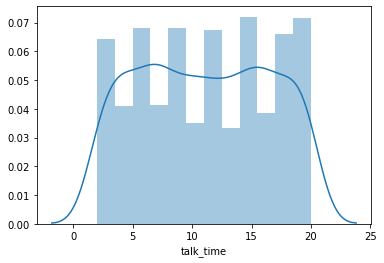

In [66]:
sns.distplot(df['talk_time'])

In [85]:
(pd.crosstab(index=df['battery_bin'], columns=df['price_range'], values=df['talk_time'], aggfunc='mean'))

price_range,0,1,2,3
battery_bin,,,,
low,10.128319,11.426036,10.401070,10.513043
medium,11.113772,11.432584,11.201439,10.929936
high,10.850467,11.209150,11.402299,11.508772


- The longest average of talk_time for **low battery** is around 11.42 hour with medium price_range
- The longest average of talk_time for **medium battery** is around 11.43 hour with medium price_range
- The longest average of talk_time for **high battery** is around 11.50 hour with Very high price_range

### `three_g`	
Has 3G or not

In [96]:
df.stb.freq(['three_g'])

,three_g,count,percent,cumulative_count,cumulative_percent
0,1,1523,76.15,1523,76.15
1,0,477,23.85,2000,100.00


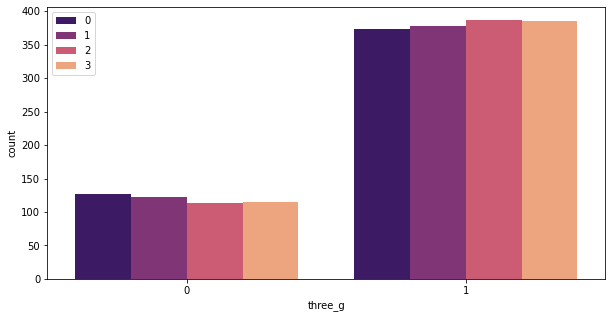

In [95]:
#Visualization
plt.figure(figsize=(10,5))
sns.countplot(df['three_g'], hue=df['price_range'], palette='magma')
plt.legend(loc='best')

- it is advisable to sell mobile phone with three_g because it could be sell in any price_range

### `touch_screen`
Has touch screen or not

In [102]:
df.stb.freq(['touch_screen'])

,touch_screen,count,percent,cumulative_count,cumulative_percent
0,1,1006,50.3,1006,50.3
1,0,994,49.7,2000,100.0


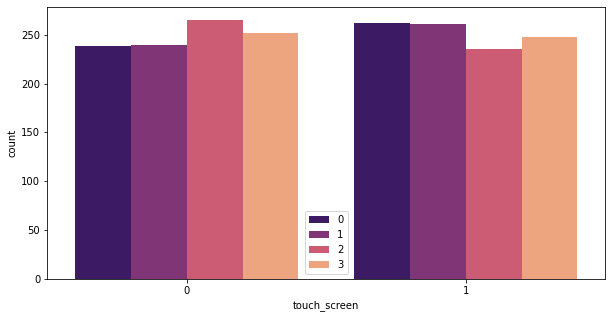

In [103]:
#Visualization
plt.figure(figsize=(10,5))
sns.countplot(df['touch_screen'], hue=df['price_range'], palette='magma')
plt.legend(loc='best')

- Mobile phone with no touch_screen could be sell in any price_range
- Mobile phone with touch_screen **should not** be sell in **high and very high cost**

### `wifi` 
Has wifi or not

In [104]:
df.stb.freq(['wifi'])

,wifi,count,percent,cumulative_count,cumulative_percent
0,1,1014,50.7,1014,50.7
1,0,986,49.3,2000,100.0


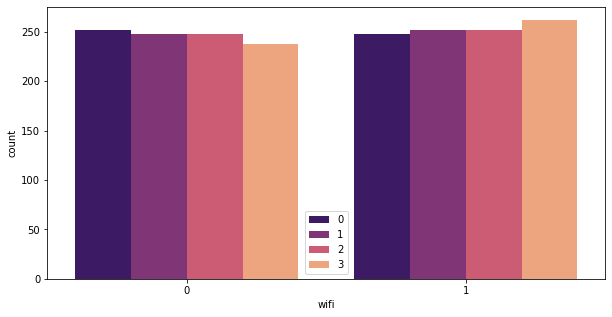

In [105]:
#Visualization
plt.figure(figsize=(10,5))
sns.countplot(df['wifi'], hue=df['price_range'], palette='magma')
plt.legend(loc='best')

- Whether or not wifi on the mobile phone **does not really affect the price_range**